## PROJECT TITLE: Predictive Analysis of Customer Churn in the Telecommunications Company: Insights and Strategies for Retention.

## This project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

### Importing the necessary libraries (pandas, matplotlib, seaborn and re) to load and work with the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

## Familiarizing with the dataset.
### Loading the dataset using pandas.

In [2]:
telco_cust = pd.read_csv("C:/Users/hp/Downloads/Telco_Customers.csv")

### Displaying the first 10 rows

In [3]:
telco_cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Identifying the data types of each column 

In [4]:
print(telco_cust.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Checking if there are missing values

In [5]:
telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### There are no null values in each column

### 

# Data Cleaning. 
### Standardizing column names to lower case and replacing spaces with underscores.

In [6]:
def smart_snake_case(column):
   
    s1 = re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower()
    
   
    s1 = s1.replace('i_d', 'id')
    s1 = s1.replace('t_v', 'tv')
    s1 = s1.replace('u_s', 'us')  
    
    return s1
telco_cust.columns = [smart_snake_case(col) for col in telco_cust.columns]


In [7]:
telco_cust.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


#### As seen above, all column names are now in snake case

## 

## Checking for empty entries

In [8]:
(telco_cust == ' ').sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

#### The column 'total_charges' has 11 empty entries. The rest of the columns don't have any empty entries.

##   

## Replacing the empty entries with null.

In [9]:
telco_cust['total_charges'] = telco_cust['total_charges'].replace(' ', pd.NA)

In [10]:
telco_cust.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

## Dropping the all the rows with null values.

In [11]:
telco_cust = telco_cust.dropna(subset = ['total_charges'])

In [12]:
telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   gender             7032 non-null   object 
 2   senior_citizen     7032 non-null   int64  
 3   partner            7032 non-null   object 
 4   dependents         7032 non-null   object 
 5   tenure             7032 non-null   int64  
 6   phone_service      7032 non-null   object 
 7   multiple_lines     7032 non-null   object 
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  contract           7032 non-null   object 
 16  paperless_billing  7032 non-n

#### all rows with null values have been dropped, from 7042 rows, we now have 7032 entries

##

## Resetting index to ensure there are no empty numbered rows in between the dataset.

In [13]:
telco_cust.reset_index(drop = True, inplace = True)

In [14]:
telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   gender             7032 non-null   object 
 2   senior_citizen     7032 non-null   int64  
 3   partner            7032 non-null   object 
 4   dependents         7032 non-null   object 
 5   tenure             7032 non-null   int64  
 6   phone_service      7032 non-null   object 
 7   multiple_lines     7032 non-null   object 
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  contract           7032 non-null   object 
 16  paperless_billing  7032 

#### all rows are now 7032, and all entries are also 7032, no empty numbered row

#

## Checking for duplicates.

In [15]:
for col in telco_cust.columns:
    if telco_cust[col].nunique() < 20:
        print(f"{col} : {telco_cust[col].unique()}")

gender : ['Female' 'Male']
senior_citizen : [0 1]
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
phone_service : ['No' 'Yes']
multiple_lines : ['No phone service' 'No' 'Yes']
internet_service : ['DSL' 'Fiber optic' 'No']
online_security : ['No' 'Yes' 'No internet service']
online_backup : ['Yes' 'No' 'No internet service']
device_protection : ['No' 'Yes' 'No internet service']
tech_support : ['No' 'Yes' 'No internet service']
streaming_tv : ['No' 'Yes' 'No internet service']
streaming_movies : ['No' 'Yes' 'No internet service']
contract : ['Month-to-month' 'One year' 'Two year']
paperless_billing : ['Yes' 'No']
payment_method : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn : ['No' 'Yes']


#### As seen above, there are no duplicates in each column.

#

### Checking the number of churned customers and getting their percentages.

In [16]:
print(telco_cust['churn'].value_counts())
print(f"Churn in % : {telco_cust['churn'].value_counts(normalize = True)*100}")

churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn in % : churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


### With 26.58 % of customers churned, this indicates that approximately 1 in 4 customers are leaving the company.


###

### Distribution of Monthly Charges between churned and non-churned customers

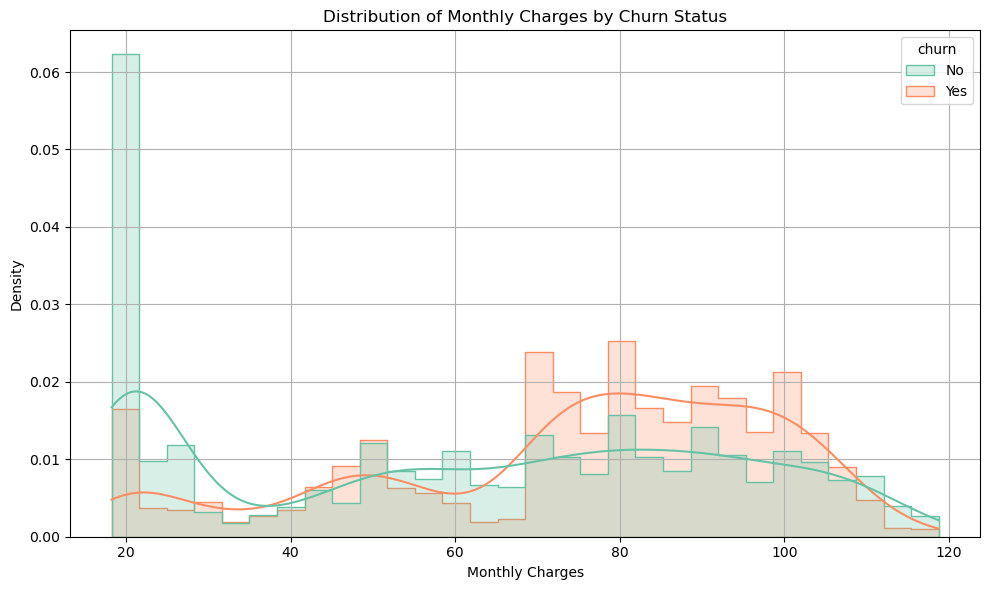

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_cust, x='monthly_charges', hue='churn', bins=30, kde=True, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


### From the above histogram, customers who **did not churn** are more evenly distributed across the **low to mid-range** of monthly charges, particularly between 20 and 80 dollars.

### In contrast, customers who **churned** tend to be slightly **concentrated toward the higher end** of monthly charges.. 
### This suggests that customers paying more each month may be more likely to churn, possibly due to price dissatisfaction or unmet expectations at premium tiers.

###

## Customer distribution by tenure (0-12 months, 13-36 months, 37+ months).

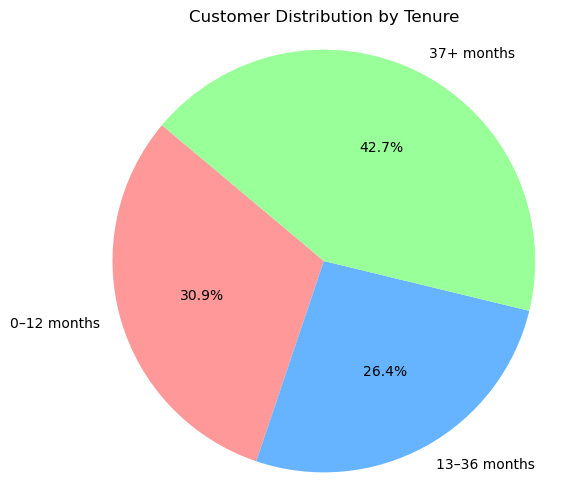

In [20]:
bins = [0, 12, 36, telco_cust['tenure'].max()]
labels = ['0–12 months', '13–36 months', '37+ months']
telco_cust['tenure_group'] = pd.cut(telco_cust['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

tenure_counts = telco_cust['tenure_group'].value_counts().sort_index()


plt.figure(figsize=(6, 6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer Distribution by Tenure')
plt.axis('equal')  
plt.show()

### As seen in the above pie chart, there is a drop in customers from 30.9% to 26.4%, this suggests that a large number of customers acquired in their first year(0-12) do not make it to the third year mark(13-36).This likely reflects churn due to poor early retention strategies or dissatisfaction in the early months.

### However, over the years, more customers (47%) stack up in the 37+ (more than 3 years) group due to long-term satisfaction and build loyalty.

#

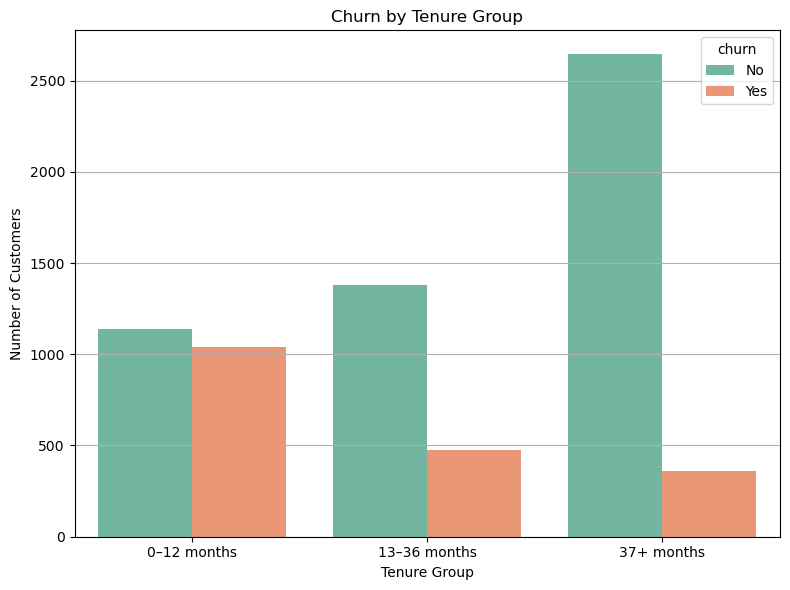

In [22]:
bins = [0, 12, 36, telco_cust['tenure'].max()]
labels = ['0–12 months', '13–36 months', '37+ months']
telco_cust['tenure_group'] = pd.cut(telco_cust['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=telco_cust, x='tenure_group', hue='churn', palette='Set2')
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### From the above graph, customers who did not churn have a much higher total tenure (194,387) compared to those who churned (33,603), indicating that long-term customers are less likely to churn. 
### This suggests that the longer a customer stays, the less likely they are to leave because of built loyalty.



#

## Comparing average monthly charges across tenure categories.

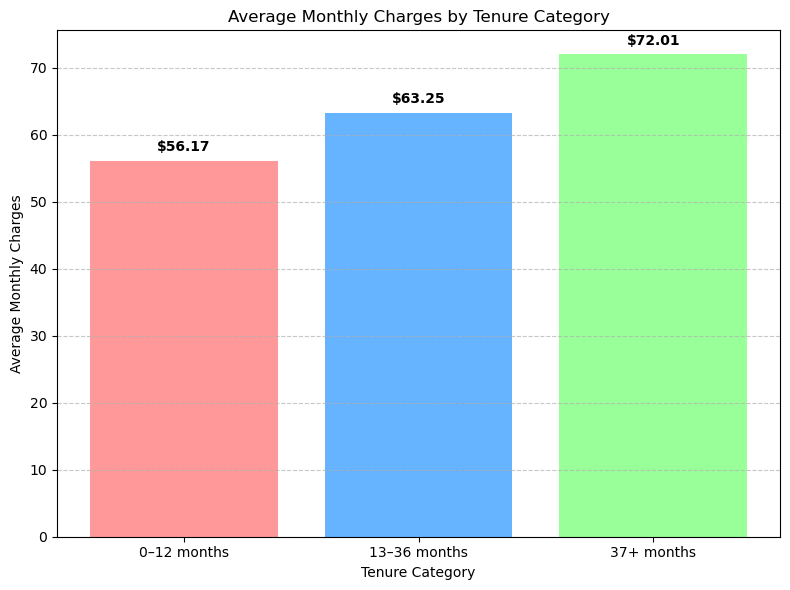

In [35]:
bins = [0, 12, 36, telco_cust['tenure'].max()]
labels = ['0–12 months', '13–36 months', '37+ months']
telco_cust['tenure_group'] = pd.cut(telco_cust['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

avg_charges = telco_cust.groupby('tenure_group')['monthly_charges'].mean()


plt.figure(figsize=(8, 6))
bars = plt.bar(avg_charges.index, avg_charges.values, color=['#ff9999','#66b3ff','#99ff99'])

plt.title('Average Monthly Charges by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Average Monthly Charges')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"${yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### From the above bar chart: 
###  **New customers (0–12 months)** tend to have lower average charges, possibly due to entry-level plans or discounts.
### **Mid-term customers (13–36 months)** show a slight increase, indicating a shift to regular pricing or service upgrades.
### **Long-term customers (37+ months)** have the **highest average charges**, suggesting they derive enough value to pay for premium or bundled services.


## 

## Analyzing churn rates by demographics (gender, senior citizen status)

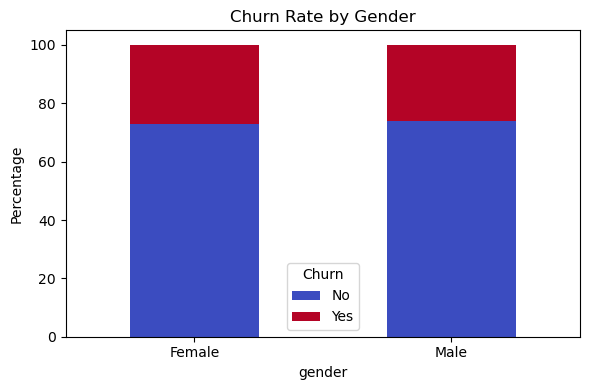

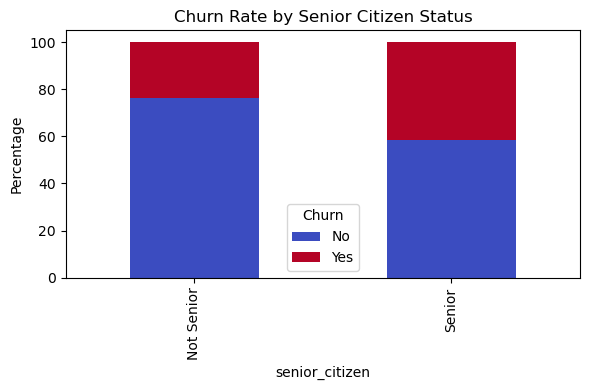

In [23]:
gender_churn = telco_cust.groupby('gender')['churn'].value_counts(normalize=True).unstack() * 100


senior_churn = telco_cust.groupby('senior_citizen')['churn'].value_counts(normalize=True).unstack() * 100


gender_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6,4))
plt.title('Churn Rate by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


senior_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6,4))
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### From the above stacked bar charts:
### Churn by gender: The churn rate is fairly similar across genders, indicating that gender alone may not be a strong predictor of customer churn.

### Churn by senior citizen status: Senior citizens tend to have a higher churn rate than non-senior customers. This could be due to factors such as: Cost sensitivity,Product/service complexity,Or unmet expectations with digital services.

## 

## Analyzing churn rates by payment methods and contract types

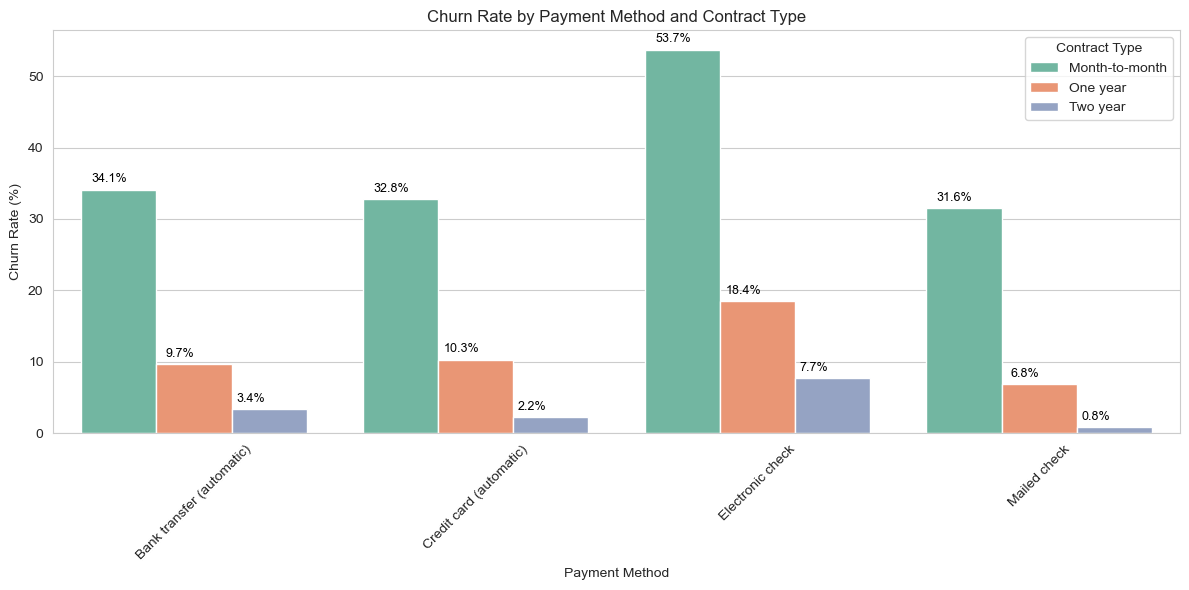

In [40]:
churn_rates = telco_cust.groupby(['payment_method', 'contract'])['churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
churn_rates.rename(columns={'churn': 'ChurnRate(%)'}, inplace=True)


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")


sns.barplot(
    data=churn_rates,
    x='payment_method',
    y='ChurnRate(%)',
    hue='contract',
    palette='Set2'
)

for i in range(len(churn_rates)):
    row = churn_rates.iloc[i]
    plt.text(
        i // 3 + (i % 3) * 0.25 - 0.3,
        row['ChurnRate(%)'] + 1,
        f"{row['ChurnRate(%)']:.1f}%",
        color='black',
        ha='center',
        fontsize=9
    )

plt.title('Churn Rate by Payment Method and Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Contract Type')
plt.tight_layout()
plt.show()

### Month-to-month contracts consistently exhibit the highest churn, across all payment methods.

### Customers using Electronic Check tend to churn more than those using Credit Card or Bank Transfer.

### Longer-term contracts like One year and Two year lead to significantly lower churn rates, indicating that contract length plays a major role in customer retention.
### Encouraging customers to switch to longer contracts or more stable payment methods may be a good strategy to reduce churn.

##  

# TRENDS OVER TIME

## CHURN RATE TREND OVER TENURE 

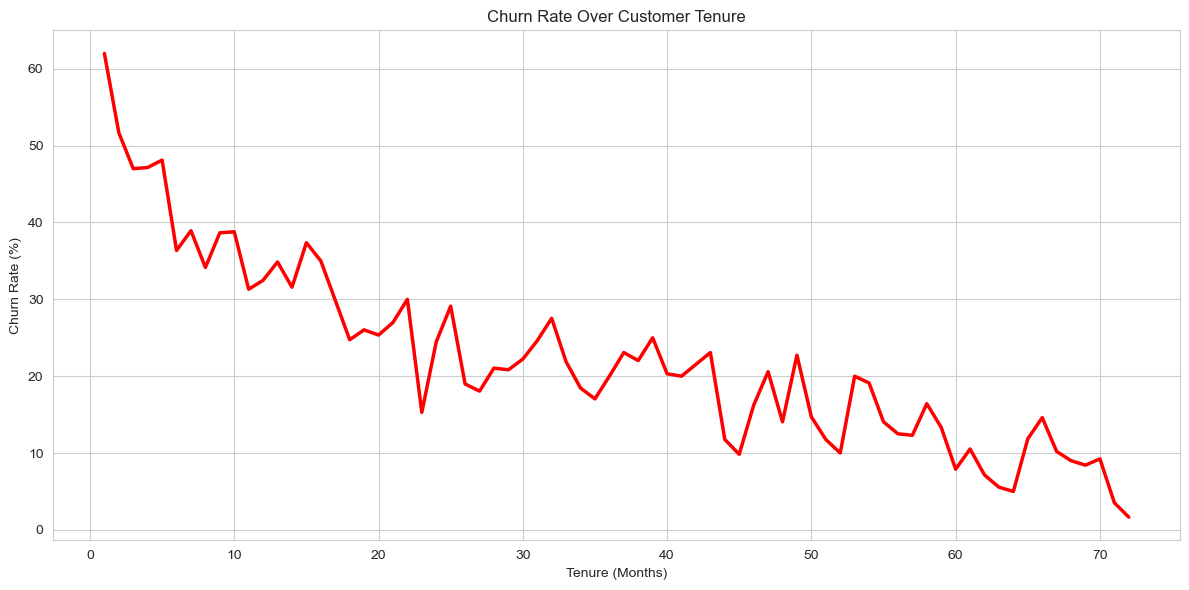

In [42]:

telco_cust['tenure'] = pd.to_numeric(telco_cust['tenure'], errors='coerce')

churn_trend = telco_cust.groupby('tenure')['churn'].apply(lambda x: (x == 'Yes').mean() * 100)

plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_trend.index, y=churn_trend.values, color='red', linewidth=2.5)
plt.title('Churn Rate Over Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### From the above line graph, the churn rate is highest during the early months (0–12), especially for new customers. 
### It drops steadily as tenure increases, indicating that customers become more loyal over time.

## 

## Monthly Charges Trend Over Tenure

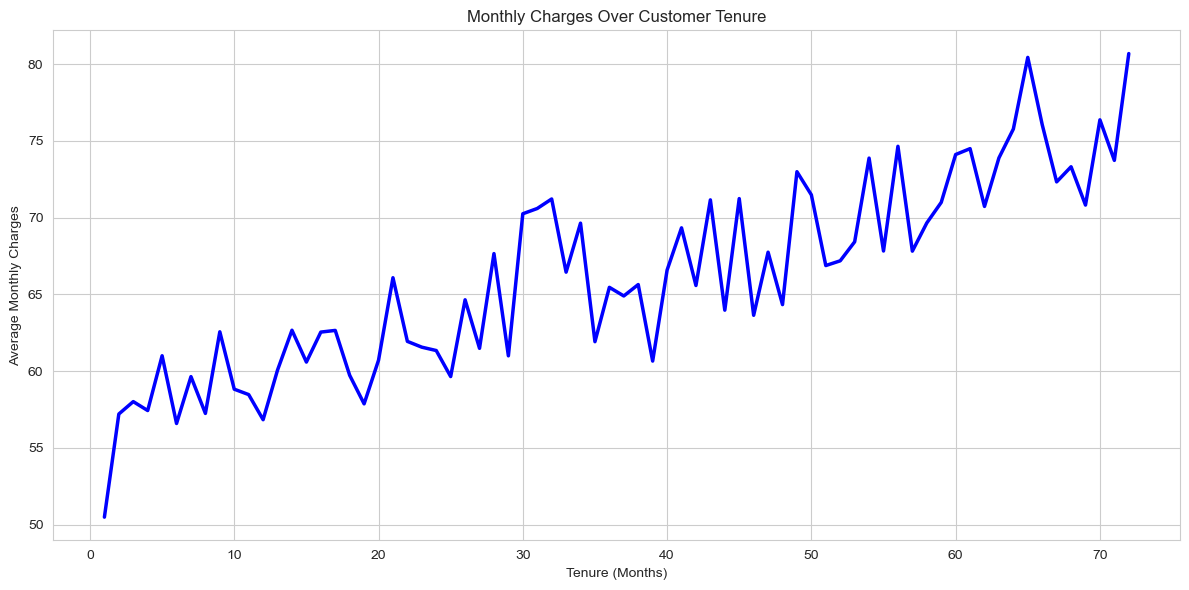

In [43]:

charges_trend = telco_cust.groupby('tenure')['monthly_charges'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=charges_trend.index, y=charges_trend.values, color='blue', linewidth=2.5)
plt.title('Monthly Charges Over Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Monthly Charges')
plt.grid(True)
plt.tight_layout()
plt.show()


### From the above line graph, monthly charges show a mild upward trend over tenure, suggesting long-term customers might adopt more services or upgrade their plans.

#

## PREDICTIVE MODELLING

### Logistic Regression for Customer Churn Prediction

In [24]:
from sklearn.preprocessing import LabelEncoder

telco_model_data = telco_cust.copy()
label_cols = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
              'internet_service', 'online_security', 'online_backup', 'device_protection',
              'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
              'paperless_billing', 'payment_method', 'churn']

le = LabelEncoder()
for col in label_cols:
    telco_model_data[col] = le.fit_transform(telco_model_data[col])


features = ['tenure', 'monthly_charges', 'contract', 'payment_method', 'internet_service', 'senior_citizen']
target = 'churn'

X = telco_model_data[features]
y = telco_model_data[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[927 106]
 [192 182]]


#### The above logistic regression model achieved an overall accuracy of 79%, indicating it correctly predicts customer churn status most of the time.

#### Precision for non-churners (No): 83% — When the model predicts a customer will stay, it is correct 83% of the time.

#### Recall for non-churners: 90% — The model successfully identifies 90% of customers who do not churn.

#### Precision for churners (Yes): 63% — Of the customers predicted to churn, 63% actually do.

#### Recall for churners: 49% — The model detects about half of the actual churners.

#### The confusion matrix shows the model correctly identifies most non-churners (927 out of 1033), but misses 192 churners, who may leave without intervention.

#

### Identifying At-Risk Customers Based on Predicted Churn Probability

### By using logistic regression model, we shall predict the likelihood of churn for each customer in the dataset.
### By applying a probability standard threshold , we identify customers who are at most risk of churning.



In [29]:
telco_test = telco_model_data.loc[X_test.index]
churn_probs = model.predict_proba(X_test)[:, 1]

at_risk_mask = churn_probs >= 0.5
at_risk_customers = telco_test[at_risk_mask].copy()
at_risk_customers['churn_probability'] = churn_probs[at_risk_mask]

at_risk_customers.head()



,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,tenure_group,churn_probability
6116,0871-URUWO,1,0,1,0,13,1,2,1,0,...,2,2,0,1,1,102.25,1359,1,13–36 months,0.671127
3463,9402-ORRAH,0,1,0,0,15,1,0,1,0,...,2,2,0,1,2,91.50,1400.3,0,13–36 months,0.709599
2168,2038-OEQZH,1,0,0,0,4,1,0,1,0,...,0,2,0,0,2,86.05,308.1,0,0–12 months,0.652689
1287,7993-PYKOF,1,0,1,0,8,1,0,1,2,...,0,0,0,0,2,75.00,632.95,1,0–12 months,0.543229
3252,5482-VXSXJ,1,0,0,0,22,1,0,1,0,...,2,2,0,1,3,93.20,2157.3,0,13–36 months,0.554194


### The model has successfully flagged a subset of customers with a high probability of churning. 
### These at-risk customers can now be the focus of retention efforts based on their tenure, contract type, and monthly cahrges.
### These insights will allow the company to target these customers with retention strategies, such as personalized offers, improved service packages, or customer support follow-ups.

